In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'MatchResult' and 'FTR' columns are present, if not, re-create them
if 'MatchResult' not in df_matches.columns:
    def get_match_result(row):
        if row['home_score'] > row['away_score']:
            return 'H'
        elif row['home_score'] < row['away_score']:
            return 'A'
        else:
            return 'D'
    df_matches['FTR'] = df_matches.apply(get_match_result, axis=1)
    result_map = {'H': 'Home Win', 'D': 'Draw', 'A': 'Away Win'}
    df_matches['MatchResult'] = df_matches['FTR'].map(result_map)

# Calculate Goal Difference
df_matches['Goal_Difference'] = df_matches['home_score'] - df_matches['away_score']

print("First 5 rows with new 'Goal_Difference' and 'MatchResult' columns:")
display(df_matches[['rank_points_ratio', 'home_score', 'away_score', 'Goal_Difference', 'MatchResult']].head())

First 5 rows with new 'Goal_Difference' and 'MatchResult' columns:


,rank_points_ratio,home_score,away_score,Goal_Difference,MatchResult
0,1.124640,2,0,2,Home Win
1,0.830527,1,1,0,Draw
2,0.889173,2,1,1,Home Win
3,1.481631,7,0,7,Home Win
4,0.908717,1,2,-1,Away Win


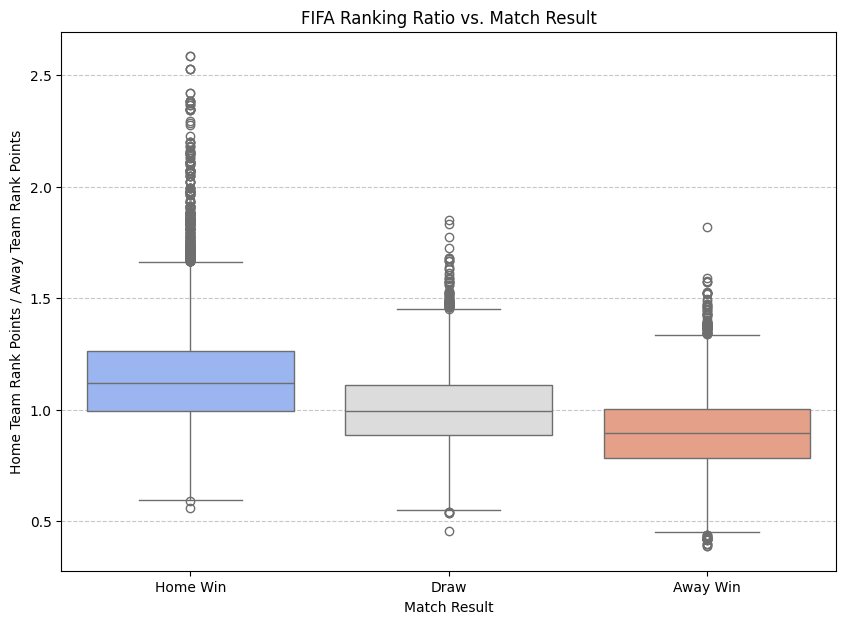

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='MatchResult', y='rank_points_ratio', data=df_matches, palette='coolwarm', hue='MatchResult', legend=False)
plt.title('FIFA Ranking Ratio vs. Match Result')
plt.xlabel('Match Result')
plt.ylabel('Home Team Rank Points / Away Team Rank Points')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

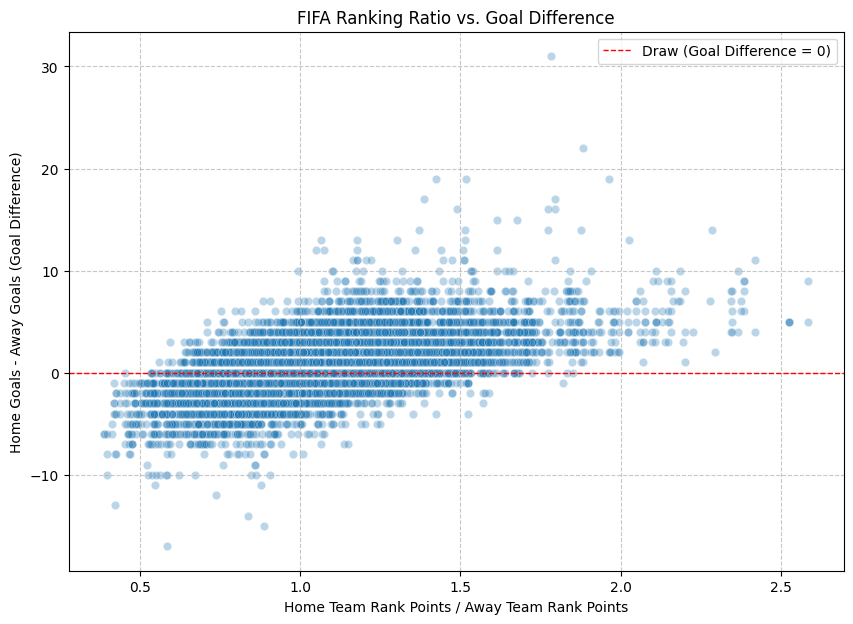

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='rank_points_ratio', y='Goal_Difference', data=df_matches, alpha=0.3)
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Draw (Goal Difference = 0)')
plt.title('FIFA Ranking Ratio vs. Goal Difference')
plt.xlabel('Home Team Rank Points / Away Team Rank Points')
plt.ylabel('Home Goals - Away Goals (Goal Difference)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()